In [1]:
import tensorflow as tf

/Users/junweiluo/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/junweiluo/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/junweiluo/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/junweiluo/anaconda3/lib/python3.7/site-pac

In [2]:
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
# create a model

model = keras.models.Sequential()

In [11]:
model.add(keras.layers.InputLayer(input_shape=[28,28]))

#model.add(keras.layers.Flatten(input_shape=[28,28]))

In [12]:
model.add(keras.layers.Dense(300, activation = 'relu' )) # can add kernel_initializer or bias_initializer for the layer.
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [14]:
model.summary()  # slightly different Flatten is considered a layer in nn but InputLayer is not.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]

In [17]:
hidden1.name

'dense_3'

In [18]:
weights, bias = hidden1.get_weights()  # these functions can be used for tracking or visualization

In [19]:
weights

array([[ 0.04399229, -0.01047516,  0.00301258, ..., -0.02005745,
        -0.06257856, -0.00855882],
       [-0.02434552,  0.02854484,  0.05554923, ...,  0.03057912,
        -0.0583613 , -0.00257969],
       [-0.06272719,  0.04199103, -0.06870117, ..., -0.03163225,
        -0.06145959, -0.02312406],
       ...,
       [ 0.01345168, -0.07137822,  0.04010291, ..., -0.02839749,
        -0.02865926,  0.01573422],
       [-0.05479312, -0.00885984,  0.00440843, ..., -0.02670226,
         0.03394932, -0.02944324],
       [-0.02525542,  0.06302123,  0.00732221, ..., -0.01589517,
         0.06687033,  0.01967852]], dtype=float32)

In [20]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
# compile the model
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])  # metrics is optional parameter.

#It might be worthwile to add that loss function and metrics are often not the same (and someone might ask: why?) 
#as we need some kind of proxy-function (loss which somewhat effects in a low error metric) 
#as some metrics are not smooth and can't be optimized by the algorithms in play.

#The loss function is that parameter one passes to Keras model.compile 
#which is actually optimized while training the model . 
#This loss function is generally minimized by the model.

#Unlike the loss function , the metric is another list of parameters passed to Keras model.compile 
#which is actually used for judging the performance of the model.

#For example : For some reason you may want to minimize the MSE loss for a regression model 
#while also want to check the AUC for the model . 
#In this case the MSE is the loss function and the AUC is the metric . 
#Metric is the model performance parameter that one can see while the model is judging itself on the validation set 
#after each epoch of training. It is important to note that the metric is important for few Keras callbacks like 
#EarlyStopping when one wants to stop training the model in case the metric isn't improving for a certaining no. of epochs.

Sparse_categorical_crossentropy: multi-classes and the classes are exclusive  (softmax function)
Categorical_crossentropy: using one hot vectors to convert multiclasses to 0/1 (softmax function)
Binary_corssentropy: 1/0 with sigmoid function.

Use keras.util.to_categorical() to convert to one-hot (then use softmax activation and categorical_crossentropy)
Use np.argmax to convert to sparse labels.

In [24]:
#train the model
#history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# validation set is optional to measure model performance on selected metrics.
# or we can use validation_split = ... instead of splitting manually.
# validation set is also used for hyperparameter tuning.

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.4878 - accuracy: 0.8265 - val_loss: 0.3749 - val_accuracy: 0.8660
Epoch 2/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3673 - accuracy: 0.8654 - val_loss: 0.3796 - val_accuracy: 0.8574
Epoch 3/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3312 - accuracy: 0.8783 - val_loss: 0.3228 - val_accuracy: 0.8834
Epoch 4/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.3036 - accuracy: 0.8867 - val_loss: 0.3074 - val_accuracy: 0.8848
Epoch 5/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.2845 - accuracy: 0.8937 - val_loss: 0.3262 - val_accuracy: 0.8850
Epoch 6/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.2695 - accuracy: 0.8989 - val_loss: 0.3333 - val_accuracy: 0.8788
Epoch 7/30
55000/55000 [==============================] -

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

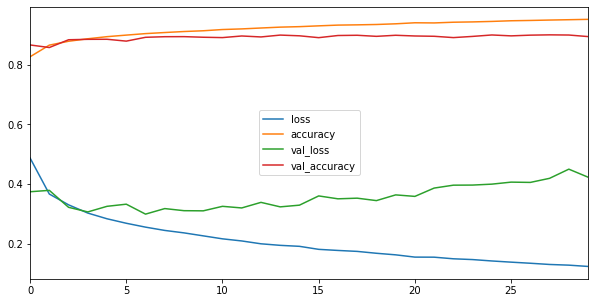

In [26]:
pd.DataFrame(history.history).plot(figsize = (10,5))

In [80]:
# model evaluation using test set.  Don't do hyperparameter tuning.
X_test = X_test/255.0
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.4308 - accuracy: 0.8916


[0.43079673901200294, 0.8916]

In [83]:
# model prediction
X_new = X_test[:3]
y_proba= model.predict(X_new)
y_proba

array([[1.7478225e-13, 7.2401141e-10, 8.7983989e-14, 5.0689512e-11,
        4.4145018e-11, 4.5590291e-08, 1.6857570e-10, 1.4150307e-05,
        1.3367597e-14, 9.9998581e-01],
       [3.2929991e-05, 2.1518719e-16, 9.9990487e-01, 1.1920468e-13,
        4.7245892e-05, 9.9912122e-20, 1.4924468e-05, 5.8894426e-26,
        2.2386121e-13, 2.2394463e-23],
       [1.0763302e-33, 1.0000000e+00, 0.0000000e+00, 4.4441715e-28,
        0.0000000e+00, 0.0000000e+00, 6.9918474e-36, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [76]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [79]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
# add cnn layers to lift performance
# create a model, architecture
model2 = keras.models.Sequential()

In [29]:
model2.add(keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28,28,1]))

In [30]:
model2.add(keras.layers.MaxPool2D(2))

In [31]:
model2.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model2.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))

In [32]:
model2.add(keras.layers.MaxPool2D(2))

In [33]:
model2.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
model2.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
model2.add(keras.layers.MaxPool2D(2))

In [34]:
model2.add(keras.layers.Flatten())  # now converted to 1-D vector as regular nn

In [35]:
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dropout(0.5))

In [36]:
model2.add(keras.layers.Dense(10, activation='softmax'))

In [52]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)        

In [37]:
# compile the model
model2.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [53]:
# train the model
import numpy as np # convert original data to 1 more dimension since it was gray scale
X_train_exp = np.expand_dims(X_train, axis = 3)
X_valid_exp = np.expand_dims(X_valid, axis = 3)
X_test_exp = np.expand_dims(X_test, axis = 3)

history2= model2.fit(X_train_exp, y_train, epochs=3, batch_size=200, validation_data=(X_valid_exp, y_valid))
# training accuracy is mean accuracy, while val accuracy is ending accuracy, not quite comparable for overfitting testing.

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 307s 6ms/sample - loss: 0.1468 - accuracy: 0.9491 - val_loss: 0.2436 - val_accuracy: 0.9204
Epoch 2/3
55000/55000 [==============================] - 322s 6ms/sample - loss: 0.1312 - accuracy: 0.9538 - val_loss: 0.2373 - val_accuracy: 0.9252
Epoch 3/3
55000/55000 [==============================] - 324s 6ms/sample - loss: 0.1213 - accuracy: 0.9575 - val_loss: 0.2568 - val_accuracy: 0.9214


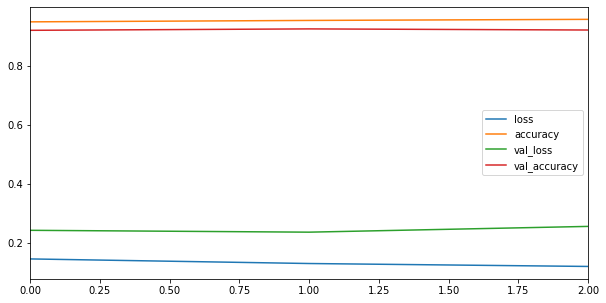

In [54]:
pd.DataFrame(history2.history).plot(figsize = (10,5))

In [69]:
# alternative way of model creation
model3 = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28,28,1]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(10, activation='softmax')
])

In [61]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 256)        

In [71]:
# alternative way of model creation
from tensorflow import keras
from keras import models, layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
model4 = Sequential([
    Conv2D(64, 7, activation='relu', padding='same', input_shape=[28,28,1]),
    MaxPool2D(2),
    Conv2D(128, 3, activation='relu', padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPool2D(2),
    Conv2D(256, 3, activation='relu', padding='same'),
    Conv2D(256, 3, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5) ,
    Dense(10, activation='softmax')
])

In [72]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 256)        